In [65]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [66]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Table into SQLAlchemy ORM

In [3]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from pathlib import Path
from sqlalchemy import desc
from sqlalchemy import inspect

In [4]:
# create engine to hawaii.sqlite
# path=Path('../Resources/hawaii.sqlite')
engine=create_engine(f"sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base=automap_base()
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
Measurement=Base.classes.measurement
Station=Base.classes.station

In [8]:
session=Session(engine)

In [9]:
first_row=session.query(Measurement.date,Measurement.id).first()
print(first_row)
    

('2010-01-01', 1)


In [10]:
count=session.query(Measurement).count()
count

19550

In [11]:
inspector = inspect(engine)
measurement_columns = inspector.get_columns("measurement")
for c in measurement_columns:
    print(c["name"], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
station_columns = inspector.get_columns("station")
for c in station_columns:
    print(c["name"],c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
# Find the most recent date in the data set.
recent_date=session.query(Measurement).order_by(desc(Measurement.id)).first()
print(recent_date.date)

2017-08-23


In [14]:
# Using that date, get the previous 12 months of precipitation data by querying the previous 12 months of data.
twelve_month=session.query(Measurement).filter(Measurement.date<='2017-08-23',Measurement.date>='2016-08-23').order_by(Measurement.date)
for i in twelve_month:
    print(i.date,i.station,i.prcp,i.tobs)

2016-08-23 USC00519397 0.0 81.0
2016-08-23 USC00513117 0.15 76.0
2016-08-23 USC00514830 0.05 80.0
2016-08-23 USC00517948 None 80.0
2016-08-23 USC00519523 0.02 80.0
2016-08-23 USC00519281 1.79 77.0
2016-08-23 USC00516128 0.7 74.0
2016-08-24 USC00519397 0.08 79.0
2016-08-24 USC00513117 2.15 76.0
2016-08-24 USC00514830 2.28 80.0
2016-08-24 USC00517948 None 78.0
2016-08-24 USC00519523 1.22 79.0
2016-08-24 USC00519281 2.15 77.0
2016-08-24 USC00516128 1.45 74.0
2016-08-25 USC00519397 0.08 80.0
2016-08-25 USC00513117 0.08 77.0
2016-08-25 USC00514830 0.0 81.0
2016-08-25 USC00517948 0.0 81.0
2016-08-25 USC00519523 0.21 80.0
2016-08-25 USC00519281 0.06 80.0
2016-08-25 USC00516128 0.11 77.0
2016-08-26 USC00519397 0.0 79.0
2016-08-26 USC00513117 0.03 78.0
2016-08-26 USC00514830 0.02 81.0
2016-08-26 USC00517948 0.04 81.0
2016-08-26 USC00519523 0.0 84.0
2016-08-26 USC00519281 0.01 80.0
2016-08-27 USC00519397 0.0 77.0
2016-08-27 USC00513117 0.18 73.0
2016-08-27 USC00514830 0.02 81.0
2016-08-27 USC005

In [15]:
# Select only the "date" and "prcp" values.

data=session.query(Measurement.date,Measurement.prcp).filter(Measurement.date<='2017-08-23',\
                                                    Measurement.date>='2016-08-23').order_by(Measurement.date)
for data_frame in data:
    print(data_frame)

('2016-08-23', 0.0)
('2016-08-23', 0.15)
('2016-08-23', 0.05)
('2016-08-23', None)
('2016-08-23', 0.02)
('2016-08-23', 1.79)
('2016-08-23', 0.7)
('2016-08-24', 0.08)
('2016-08-24', 2.15)
('2016-08-24', 2.28)
('2016-08-24', None)
('2016-08-24', 1.22)
('2016-08-24', 2.15)
('2016-08-24', 1.45)
('2016-08-25', 0.08)
('2016-08-25', 0.08)
('2016-08-25', 0.0)
('2016-08-25', 0.0)
('2016-08-25', 0.21)
('2016-08-25', 0.06)
('2016-08-25', 0.11)
('2016-08-26', 0.0)
('2016-08-26', 0.03)
('2016-08-26', 0.02)
('2016-08-26', 0.04)
('2016-08-26', 0.0)
('2016-08-26', 0.01)
('2016-08-27', 0.0)
('2016-08-27', 0.18)
('2016-08-27', 0.02)
('2016-08-27', 0.0)
('2016-08-27', 0.12)
('2016-08-27', None)
('2016-08-28', 0.01)
('2016-08-28', 0.14)
('2016-08-28', 0.14)
('2016-08-28', 0.14)
('2016-08-28', 0.6)
('2016-08-28', 2.07)
('2016-08-29', 0.0)
('2016-08-29', 0.17)
('2016-08-29', 0.04)
('2016-08-29', None)
('2016-08-29', 0.0)
('2016-08-29', 0.35)
('2016-08-29', 0.9)
('2016-08-30', 0.0)
('2016-08-30', 0.0)
('2016

In [16]:
# Load the query results into a Pandas DataFrame. Explicitly set the column names.
df=pd.DataFrame(data)
df

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
...,...,...
2225,2017-08-22,0.50
2226,2017-08-23,0.00
2227,2017-08-23,0.00
2228,2017-08-23,0.08


In [17]:
# Sort the DataFrame values by "date".
sorted_df=df.sort_values(by='date')
sorted_df

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
...,...,...
2225,2017-08-22,0.50
2228,2017-08-23,0.08
2226,2017-08-23,0.00
2227,2017-08-23,0.00


In [18]:
indexed_df=df.set_index('date')
indexed_df

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


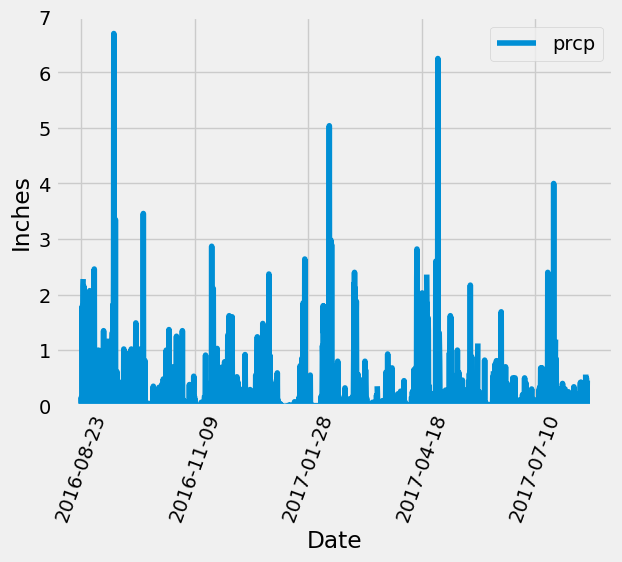

In [71]:
# Plot the results by using the DataFrame plot method, as the following image shows:
indexed_df.plot()
plt.ylim(0,7)
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.savefig("Output/BarGraph.png")
plt.show()

In [69]:
# plt.savefig("Output/BarGraph.pdf")
# plt.show()

In [20]:
# Use Pandas to print the summary statistics for the precipitation data.
indexed_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [21]:
# Design a query to calculate the total number of stations in the dataset
count=session.query(Station.station).distinct().count()
count

9

In [41]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
countby_station=session.query(Measurement.station,func.count(Measurement.station))\
    .group_by(Measurement.station).order_by(desc(func.count(Measurement.station)))
for i in countby_station:
    print(i)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [43]:
min_temp=session.query(Measurement.station,func.min(Measurement.tobs)).filter(Measurement.station=='USC00519281')
for i in min_temp:
    print(i)

('USC00519281', 54.0)


In [44]:
max_temp=session.query(Measurement.station,func.max(Measurement.tobs)).filter(Measurement.station=='USC00519281')
for i in max_temp:
    print(i)

('USC00519281', 85.0)


In [45]:
avg_temp=session.query(Measurement.station,func.avg(Measurement.tobs)).filter(Measurement.station=='USC00519281')
for i in avg_temp:
    print(i)

('USC00519281', 71.66378066378067)


In [34]:
highest_num_TOBS=session.query(Measurement).filter(Measurement.station=='USC00519281').filter(Measurement.date>='2016-08-23')
for i in highest_num_TOBS:
    print(i.date)
    

2016-08-23
2016-08-24
2016-08-25
2016-08-26
2016-08-27
2016-08-28
2016-08-29
2016-08-30
2016-08-31
2016-09-01
2016-09-02
2016-09-03
2016-09-04
2016-09-05
2016-09-06
2016-09-07
2016-09-08
2016-09-09
2016-09-10
2016-09-11
2016-09-12
2016-09-13
2016-09-14
2016-09-15
2016-09-16
2016-09-17
2016-09-18
2016-09-19
2016-09-20
2016-09-21
2016-09-22
2016-09-23
2016-09-24
2016-09-25
2016-09-26
2016-09-27
2016-09-28
2016-09-29
2016-09-30
2016-10-01
2016-10-02
2016-10-03
2016-10-04
2016-10-05
2016-10-06
2016-10-07
2016-10-08
2016-10-09
2016-10-10
2016-10-11
2016-10-12
2016-10-13
2016-10-14
2016-10-15
2016-10-16
2016-10-17
2016-10-18
2016-10-19
2016-10-20
2016-10-21
2016-10-22
2016-10-23
2016-10-24
2016-10-25
2016-10-26
2016-10-27
2016-10-28
2016-10-29
2016-10-30
2016-10-31
2016-11-01
2016-11-02
2016-11-03
2016-11-04
2016-11-05
2016-11-06
2016-11-07
2016-11-08
2016-11-09
2016-11-10
2016-11-11
2016-11-12
2016-11-13
2016-11-14
2016-11-15
2016-11-16
2016-11-17
2016-11-18
2016-11-19
2016-11-20
2016-11-21

In [46]:
# Filter by the station that has the greatest number of observations.
highest_station=session.query(Measurement.station,func.count(Measurement.station))\
    .group_by(Measurement.station).order_by(desc(func.count(Measurement.station))).first()
highest_station

('USC00519281', 2772)

In [50]:
# Query the previous 12 months of TOBS data for that station
one_year_TOBS=session.query(Measurement.tobs).filter(Measurement.date>='2016-08-23').filter(Measurement.station=='USC00519281')
for i in one_year_TOBS:
    print(i.tobs)

77.0
77.0
80.0
80.0
75.0
73.0
78.0
77.0
78.0
80.0
80.0
78.0
78.0
78.0
73.0
74.0
80.0
79.0
77.0
80.0
76.0
79.0
75.0
79.0
78.0
79.0
78.0
78.0
76.0
74.0
77.0
78.0
79.0
79.0
77.0
80.0
78.0
78.0
78.0
77.0
79.0
79.0
79.0
79.0
75.0
76.0
73.0
72.0
71.0
77.0
79.0
78.0
79.0
77.0
79.0
77.0
78.0
78.0
78.0
78.0
77.0
74.0
75.0
76.0
73.0
76.0
74.0
77.0
76.0
76.0
74.0
75.0
75.0
75.0
75.0
71.0
63.0
70.0
68.0
67.0
77.0
74.0
77.0
76.0
76.0
75.0
76.0
75.0
73.0
75.0
73.0
75.0
74.0
75.0
74.0
75.0
73.0
75.0
73.0
73.0
74.0
70.0
72.0
70.0
67.0
67.0
69.0
70.0
68.0
69.0
69.0
66.0
65.0
68.0
62.0
75.0
70.0
69.0
76.0
76.0
74.0
73.0
71.0
74.0
74.0
72.0
71.0
72.0
74.0
69.0
67.0
72.0
70.0
64.0
63.0
63.0
62.0
70.0
70.0
62.0
62.0
63.0
65.0
69.0
77.0
70.0
74.0
69.0
72.0
71.0
69.0
71.0
71.0
72.0
72.0
69.0
70.0
66.0
65.0
69.0
68.0
68.0
68.0
59.0
60.0
70.0
73.0
75.0
64.0
59.0
59.0
62.0
68.0
70.0
73.0
79.0
75.0
65.0
70.0
74.0
70.0
70.0
71.0
71.0
71.0
69.0
61.0
67.0
65.0
72.0
71.0
73.0
72.0
77.0
73.0
67.0
62.0
64.0
67.0
66.0


In [51]:
df = pd.DataFrame(one_year_TOBS)
print(df)

     tobs
0    77.0
1    77.0
2    80.0
3    80.0
4    75.0
..    ...
347  77.0
348  77.0
349  76.0
350  76.0
351  79.0

[352 rows x 1 columns]


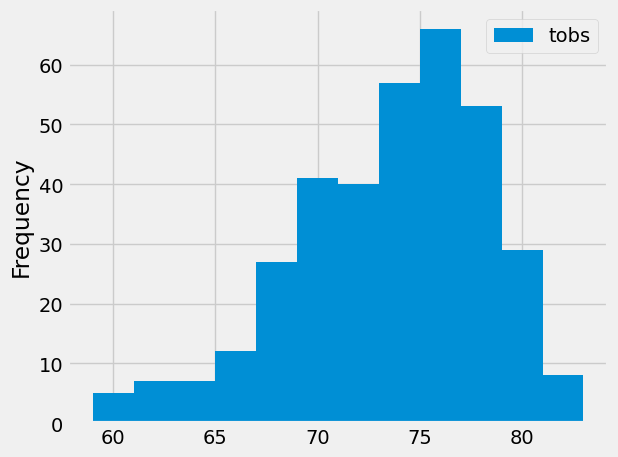

In [74]:
df.plot.hist(bins=12)
plt.tight_layout()
plt.savefig("Output/Histogram.png")
plt.show()

<Figure size 640x480 with 0 Axes>

In [39]:
session.close()